<a href="https://colab.research.google.com/github/2303a52506/23CSBTB50/blob/main/STATML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
d=pd.read_csv('/content/btcusd_1-min_data.csv')
print(d)

            Timestamp    Open    High     Low   Close    Volume
0        1.325412e+09    4.58    4.58    4.58    4.58  0.000000
1        1.325412e+09    4.58    4.58    4.58    4.58  0.000000
2        1.325412e+09    4.58    4.58    4.58    4.58  0.000000
3        1.325412e+09    4.58    4.58    4.58    4.58  0.000000
4        1.325412e+09    4.58    4.58    4.58    4.58  0.000000
...               ...     ...     ...     ...     ...       ...
1449641  1.412398e+09  358.09  358.09  358.09  358.09  0.000000
1449642  1.412398e+09  356.42  356.42  356.42  356.42  2.000000
1449643  1.412398e+09  357.95  357.95  357.95  357.95  0.016588
1449644  1.412398e+09  357.90  357.90  357.90  357.90  0.027442
1449645  1.412398e+09  357.90  357.90  357.90    3.00       NaN

[1449646 rows x 6 columns]


In [2]:
d.isnull()

,Timestamp,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1449641,False,False,False,False,False,False
1449642,False,False,False,False,False,False
1449643,False,False,False,False,False,False
1449644,False,False,False,False,False,False


In [3]:
y=d['High']
print(y)

0            4.58
1            4.58
2            4.58
3            4.58
4            4.58
            ...  
1449641    358.09
1449642    356.42
1449643    357.95
1449644    357.90
1449645    357.90
Name: High, Length: 1449646, dtype: float64


In [4]:
x=d.drop('High',axis=1)
print(x)

            Timestamp    Open     Low   Close    Volume
0        1.325412e+09    4.58    4.58    4.58  0.000000
1        1.325412e+09    4.58    4.58    4.58  0.000000
2        1.325412e+09    4.58    4.58    4.58  0.000000
3        1.325412e+09    4.58    4.58    4.58  0.000000
4        1.325412e+09    4.58    4.58    4.58  0.000000
...               ...     ...     ...     ...       ...
1449641  1.412398e+09  358.09  358.09  358.09  0.000000
1449642  1.412398e+09  356.42  356.42  356.42  2.000000
1449643  1.412398e+09  357.95  357.95  357.95  0.016588
1449644  1.412398e+09  357.90  357.90  357.90  0.027442
1449645  1.412398e+09  357.90  357.90    3.00       NaN

[1449646 rows x 5 columns]


In [5]:
dd = (x - x.min()) / (x.max() - x.min())
print(dd)


            Timestamp      Open       Low     Close    Volume
0        0.000000e+00  0.000673  0.000673  0.001362  0.000000
1        6.897670e-07  0.000673  0.000673  0.001362  0.000000
2        1.379534e-06  0.000673  0.000673  0.001362  0.000000
3        2.069301e-06  0.000673  0.000673  0.001362  0.000000
4        2.759068e-06  0.000673  0.000673  0.001362  0.000000
...               ...       ...       ...       ...       ...
1449641  9.999972e-01  0.305633  0.305636  0.306112  0.000000
1449642  9.999979e-01  0.304193  0.304195  0.304672  0.000486
1449643  9.999986e-01  0.305512  0.305515  0.305991  0.000004
1449644  9.999993e-01  0.305469  0.305472  0.305948  0.000007
1449645  1.000000e+00  0.305469  0.305472  0.000000       NaN

[1449646 rows x 5 columns]


In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(d, test_size = 20) # This line defines the train variable.

# Use integer indexing for iloc
x_train = train.iloc[:, :20] # Select the first 20 columns
x_train=x_train.dropna()
x_test = test.iloc[:, :20]
x_test=x_test.dropna()
y_train = train['High']
y_train=y_train.dropna()
y_test = test['High']
y_test=y_test.dropna()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


min_samples = 1000  # Example value, adjust as needed

x_train = x_train[:min_samples]
y_train = y_train[:min_samples]
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [12]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Generate predictions for the training and test data using your trained model (model_svr)
y_pred_train = model_svr.predict(x_train)
y_pred_test = model_svr.predict(x_test)


print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')
print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

train data MAE score SVR: 202.87326629514078
train data RMSE score SVR: 303.8603640832724

test data MSE score SVR: 124958.76103050998
test data MAE score SVR: 253.96245398317046
test data RMSE score SVR: 353.4950650723571



In [16]:
from sklearn.linear_model import Lasso, Ridge
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [19]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

# Generate predictions for the training data
y_pred_lasso_train = model_lasso.predict(x_train)

#Now use y_pred_lasso_train to evaluate the training performance
print(f'train data MAE score lasso: {mean_absolute_error(y_train, y_pred_lasso_train)}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train, y_pred_lasso_train)}')

train data MAE score lasso: 0.23763933726639772
train data RMSE score lasso: 0.6443011799433088


In [21]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [23]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

# Generate predictions for the training and testing data using the trained Ridge model
y_pred_ridge1 = model_ridge.predict(x_train) # Predictions for training data
y_pred_ridge = model_ridge.predict(x_test)  # Predictions for testing data

print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 3.834575038506987e-06
train data MAE score ridge: 0.0006367691780935978
train data RMSE score ridge: 0.0019582070979615477

test data MSE score ridge: 7.645083519804983e-07
test data MAE score ridge: 0.0005336640975756701
test data RMSE score ridge: 0.0008743616825893609



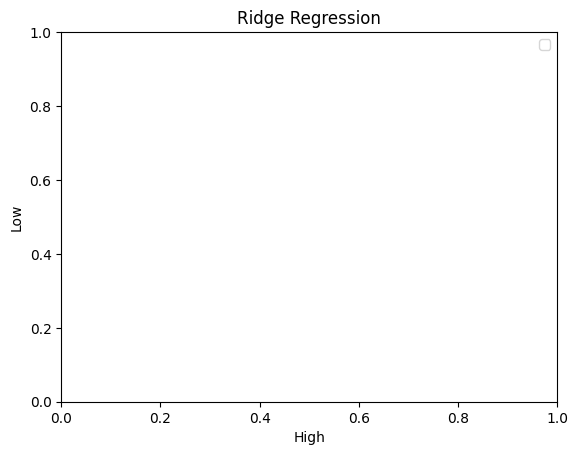

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
import pandas as pd
# Sample data
data = pd.DataFrame({'High': [100, 200, 150, 300, 250], 'Low': [10, 20, 15,30, 25]})
# Defining X (independent variable) and y (dependent variable)
X_ridge = data[['High']].to_numpy()
y_ridge = data['Low'].to_numpy()
# Ridge regression model
plt.xlabel('High')
plt.ylabel('Low')
plt.title('Ridge Regression')
plt.legend()

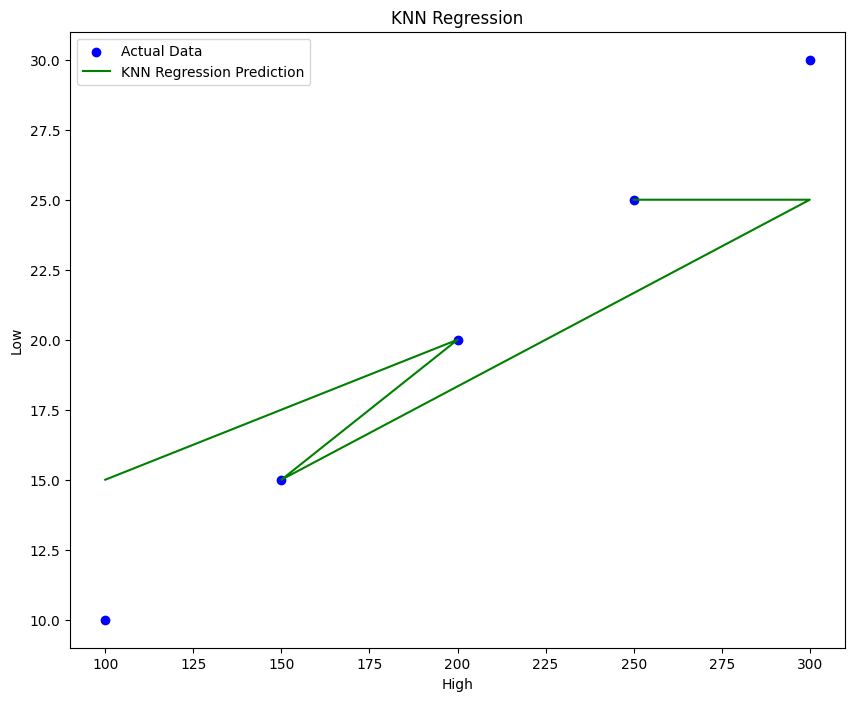

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
data = pd.DataFrame({'High': [100, 200, 150, 300, 250], 'Low': [10, 20, 15,30, 25]})
X_knn = data[['High']].to_numpy()
y_knn = data['Low'].to_numpy()
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_knn, y_knn)
y_pred_knn = knn.predict(X_knn)
plt.figure(figsize=(10, 8))
plt.scatter(X_knn, y_knn, color='blue', label='Actual Data')
plt.plot(X_knn, y_pred_knn, color='green', label='KNN Regression Prediction')
plt.xlabel('High')
plt.ylabel('Low')
plt.title('KNN Regression')
plt.legend()
plt.show()

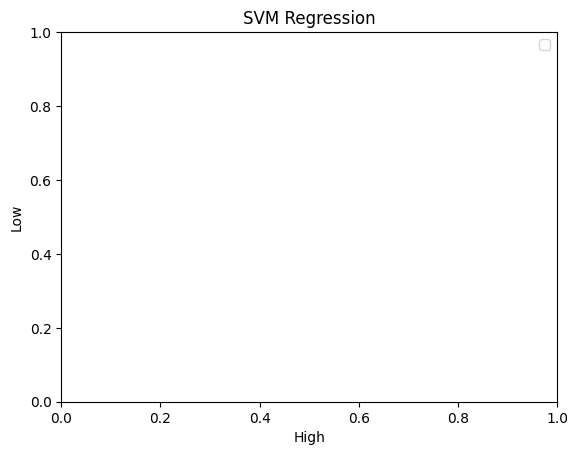

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
import pandas as pd
# Sample data
data = pd.DataFrame({'High': [100, 200, 150, 300, 250], 'Low': [10, 20, 15,30, 25]})
# Defining X (independent variable) and y (dependent variable)
X_svm = data[['High']].to_numpy()
y_svm = data['Low'].to_numpy()
# SVM regression model with an RBF kernel
plt.xlabel('High')
plt.ylabel('Low')
plt.title('SVM Regression')
plt.legend()
plt.show()

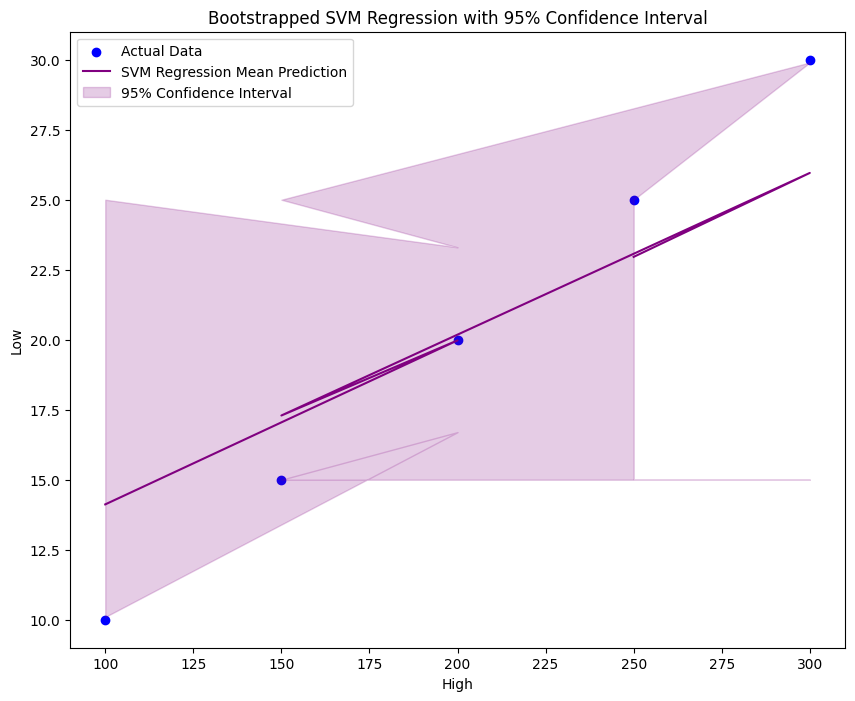

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.utils import resample

data = pd.DataFrame({'High': [100, 200, 150, 300, 250], 'Low': [10, 20, 15, 30, 25]})
x = data[['High']].to_numpy()
y = data['Low'].to_numpy()
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(x, y)

# Number of bootstrap samples
n_bootstraps = 1000

# Store bootstrapped predictions
bootstrapped_predictions = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    # Resample the data with replacement
    x_resampled, y_resampled = resample(x, y)

    # Fit the model on the resampled data
    svr.fit(x_resampled, y_resampled)

    # Predict on the original data
    y_pred = svr.predict(x)

    # Store the predictions
    bootstrapped_predictions.append(y_pred)

# Calculate percentiles for confidence intervals
y_pred_lower = np.percentile(bootstrapped_predictions, 2.5, axis=0)
y_pred_upper = np.percentile(bootstrapped_predictions, 97.5, axis=0)
y_pred_mean = np.mean(bootstrapped_predictions, axis=0)  # Calculate mean prediction


plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred_mean, color='purple', label='SVM Regression Mean Prediction')
plt.fill_between(x.flatten(), y_pred_lower, y_pred_upper, color='purple', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('High')
plt.ylabel('Low')
plt.title('Bootstrapped SVM Regression with 95% Confidence Interval')
plt.legend()
plt.show()